# Ensembles

## Imports

In [1]:
from sklearn.datasets import fetch_openml 
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import matplotlib.pyplot as plt 

## Import the MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

C:\Users\bogda\Desktop\data_and_ai_5\ensembles\venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Split the dataset into training, validation, and testing sets

In [3]:
X_train, y_train = X[:50000], y[:50000] 
X_val, y_val = X[50000:60000], y[50000:60000] 
X_test, y_test = X[60000:], y[60000:] 

## Train various classifiers

### Gradient Boosting Classifier

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

In [4]:
clf_gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf_gbc.score(X_test, y_test)

0.7306

#### Evaluate on the validation set

In [5]:
y_pred_gb = clf_gbc.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print('Gradient Boosting Accuracy:', accuracy_gb)

Gradient Boosting Accuracy: 0.7436


#### Random Forest Classifier

The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques [B1998] specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

As other classifiers, forest classifiers have to be fitted with two arrays: a sparse or dense array X of shape (n_samples, n_features) holding the training samples, and an array Y of shape (n_samples,) holding the target values (class labels) for the training samples.

In [6]:
clf_rfc = RandomForestClassifier(n_estimators=10)
clf_rfc = clf_rfc.fit(X_train, y_train)

#### Evaluate on the validation set

In [7]:
y_pred_rf = clf_rfc.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf) 

Random Forest Accuracy: 0.9495


#### Bagging meta-estimator

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. In many cases, bagging methods constitute a basic way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm. As they provide a way to reduce overfitting, bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).

In [8]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging = bagging.fit(X_train, y_train)

#### Evaluate on the validation set

In [9]:
y_pred_bag = bagging.predict(X_val)
accuracy_bag = accuracy_score(y_val, y_pred_bag)
print('Bagging Classifier Accuracy:', accuracy_bag)

Bagging Classifier Accuracy: 0.9686


#### Neural Network Classifier
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples

In [10]:
# clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# clf_mlp.fit(X_train, y_train)

clf_mlp = MLPClassifier(random_state=1, max_iter=300)
clf_mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

#### Evaluate on the validation set

In [11]:
y_pred_nn = clf_mlp.predict(X_val)
accuracy_nn = accuracy_score(y_val, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)

Neural Network Accuracy: 0.9643


#### Support vector machines 
SVMs are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support for vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where the number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [12]:
clf_svm = svm.SVC(probability=True)
clf_svm.fit(X_train, y_train)

SVC(probability=True)

#### Evaluate on the validation set

In [13]:
y_pred_svm = clf_svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

SVM Classifier Accuracy: 0.9802


#### Document the performance of each classifier on the validation set

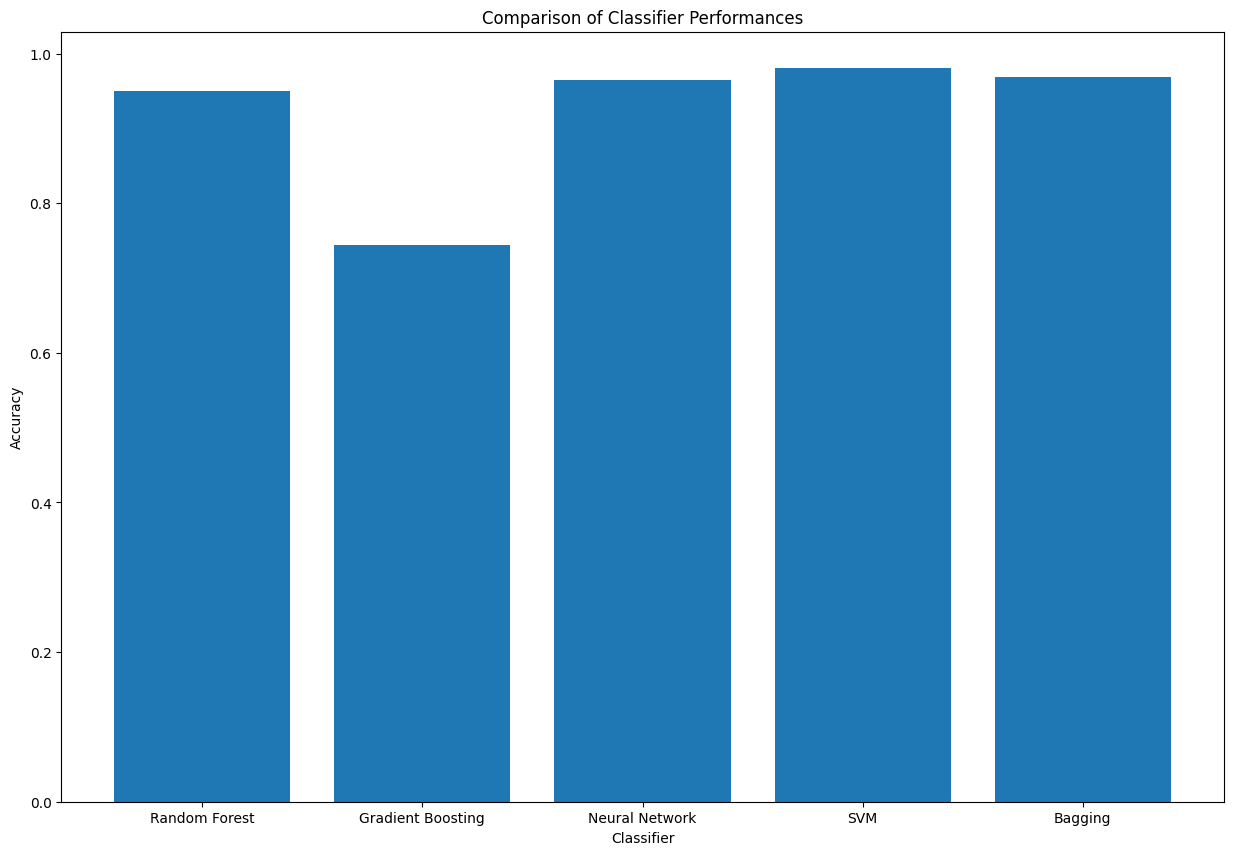

In [14]:
performance_dict = {
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'Neural Network': accuracy_nn, 
    'SVM': accuracy_svm, 
    'Bagging': accuracy_bag
} 

plt.figure(figsize=(15, 10))
plt.bar(performance_dict.keys(), performance_dict.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Performances')
plt.show()

## Combine the classifiers into a voting ensemble

There are two types of voting ensembles you can create: hard voting and soft voting.
- **Hard voting:** the predicted class is the one with the most votes from the classifiers.
- **Soft voting:** the predicted class is the one with the highest probability, averaged over all the individual classifiers.

## Voting classifier
The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing models to balance out their individual weaknesses.

#### Majority Class Labels (Majority/Hard Voting)
In majority voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.

E.g., if the prediction for a given sample is

classifier 1 -> class 1

classifier 2 -> class 1

classifier 3 -> class 2

the VotingClassifier (with voting='hard') would classify the sample as “class 1” based on the majority class label.

In the cases of a tie, the VotingClassifier will select the class based on the ascending sort order. E.g., in the following scenario

classifier 1 -> class 2

classifier 2 -> class 1

the class label 1 will be assigned to the sample.

In [15]:
eclf_hard = VotingClassifier(estimators=[('gb', clf_gbc), ('rf', clf_rfc), ('bagging', bagging), ('svc', clf_svm), ('mlp', clf_mlp)], voting='hard')
eclf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         n_estimators=10,
                                                         random_state=0)),
                             ('rf', RandomForestClassifier(n_estimators=10)),
                             ('bagging',
                              BaggingClassifier(estimator=KNeighborsClassifier(),
                                                max_features=0.5,
                                                max_samples=0.5)),
                             ('svc', SVC(probability=True)),
                             ('mlp',
                              MLPClassifier(max_iter=300, random_state=1))])

#### Evaluate the voting classifier on the validation set

In [16]:
y_pred_voting_hard = eclf_hard.predict(X_val)
accuracy_voting_hard = accuracy_score(y_val, y_pred_voting_hard)
print('Hard Voting Accuracy on Validation Set:', accuracy_voting_hard)

Hard Voting Accuracy on Validation Set: 0.9755


#### Evaluate the voting classifier on the test set

In [17]:
y_pred_hard_test = eclf_hard.predict(X_test)
accuracy_hard_test = accuracy_score(y_test, y_pred_hard_test)
print("Hard Voting Accuracy on Test Set:", accuracy_hard_test)

Hard Voting Accuracy on Test Set: 0.9721


#### Weighted Average Probabilities (Soft Voting)
In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

In [ ]:
eclf_soft = VotingClassifier(estimators=[('gb', clf_gbc), ('rf', clf_rfc), ('bagging', bagging), ('svc', clf_svm), ('mlp', clf_mlp)], voting='soft') 
eclf_soft.fit(X_train, y_train)

#### Evaluate the voting classifier on the validation set

In [ ]:
y_pred_voting_soft = eclf_soft.predict(X_val)
accuracy_voting_soft = accuracy_score(y_val, y_pred_voting_soft)
print('Soft Voting Accuracy on Validation Set:', accuracy_voting_soft)

#### Evaluate the voting classifier on the test set

In [ ]:
y_pred_soft_test = eclf_soft.predict(X_test)
accuracy_soft_test = accuracy_score(y_test, y_pred_soft_test)
print("Soft Voting Accuracy on Test Set:", accuracy_soft_test)

This will give you a comprehensive comparison of both hard and soft voting ensembles on both the validation and test sets. Based on the results, you can see that the soft voting ensemble outperforms the hard voting ensemble on both the validation and test sets.

#### Record the results

In [ ]:
results_dict = {
    'Validation Set': {
        'Hard Voting': accuracy_voting_hard,
        'Soft Voting': accuracy_voting_soft
    },
    'Test Set': {
        'Hard Voting': accuracy_hard_test,
        'Soft Voting': accuracy_soft_test
    }
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Validation Set
axes[0].bar(results_dict['Validation Set'].keys(), results_dict['Validation Set'].values())
axes[0].set_title('Validation Set Performance')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Voting Type')

# Test Set
axes[1].bar(results_dict['Test Set'].keys(), results_dict['Test Set'].values())
axes[1].set_title('Test Set Performance')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Voting Type')

plt.tight_layout()
plt.show()

## Use each classifier to make predictions on the validation set
These classifiers have been previously trained on the training set. We use these predictions on the validation set to create a new dataset for training our blender classifier.

In [41]:
predictions_rf = clf_rfc.predict(X_val)
predictions_gb = clf_gbc.predict(X_val)
predictions_mlp = clf_mlp.predict(X_val)
predictions_svm = clf_svm.predict(X_val)

### Create a new training set
Each instance in this new dataset will be a vector containing the set of predictions from all your classifiers for an image.

Stacking (stacked generalization) involves training a new model to combine the predictions of several base models. In this section, we will implement a stacking ensemble using classifiers trained on the MNIST dataset. The goal is to see if the stacking ensemble can outperform the individual base classifiers and other ensemble methods.

The new training set for the blender is created by stacking the predictions from each base classifier. Each instance in this new dataset is a vector of predictions from the base classifiers. 

In [42]:
X_new_train = np.column_stack([predictions_rf, predictions_gb, predictions_mlp, predictions_svm])

## Train a "blender" on this new training set

 This blender will act as a meta-classifier in a stacking ensemble, where it learns to combine the predictions of the base classifiers in a meaningful way.
 
Train a logistic regression model to serve as our blender. This model learns to make final predictions based on the combined predictions of the base classifiers.

In [43]:
blender = LogisticRegression(max_iter=1000) 
blender.fit(X_new_train, y_val)

C:\Users\bogda\Desktop\data_and_ai_5\ensembles\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Evaluate the Stacking Ensemble
After training the blender, you can use it to make predictions. To do this, you first get predictions from all the base classifiers on a new test set, stack these predictions (just like you did for the training set), and then use the blender to make the final prediction.

In [44]:
test_predictions_rf = clf_rfc.predict(X_test)
test_predictions_gb = clf_gbc.predict(X_test)
test_predictions_mlp = clf_mlp.predict(X_test)
test_predictions_svm = clf_svm.predict(X_test)

# stack predictions
X_test_new = np.column_stack([test_predictions_rf, test_predictions_gb, test_predictions_mlp, test_predictions_svm])  

### Evaluate the Stacking Ensemble

In [45]:
final_predictions = blender.predict(X_test_new)
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy of Stacking Ensemble:", accuracy)

Accuracy of Stacking Ensemble: 0.9553


## Use SciKit Learn StackingClassifier
Stack of estimators with a final classifier.

Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

Note that *estimators_* are fitted on the full *X* while *final_estimator_* is trained using cross-validated predictions of the base estimators using cross_val_predict.

In [46]:
stacking_clf = StackingClassifier(estimators=[('gb', clf_gbc), ('rf', clf_rfc), ('bagging', bagging), ('svc', clf_svm), ('mlp', clf_mlp)], final_estimator=blender)

### Train the Stacking Classifier

In [47]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           n_estimators=10,
                                                           random_state=0)),
                               ('rf', RandomForestClassifier(n_estimators=10)),
                               ('bagging',
                                BaggingClassifier(estimator=KNeighborsClassifier(),
                                                  max_features=0.5,
                                                  max_samples=0.5))],
                   final_estimator=LogisticRegression(max_iter=1000))

### Evaluate the Stacking Classifier

In [41]:
y_pred_stacking = stacking_clf.predict(X_test) 
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy of Stacking Classifier:", accuracy_stacking)

Accuracy of Stacking Classifier: 0.9763


## The Logistic Regression Classifier has a better accuracy than the Stacking Classifier. Why?

The Stacking Classifier is a meta-classifier that combines the predictions of the base classifiers in a meaningful way. The Logistic Regression Classifier is a single classifier that uses a logistic function to model a binary dependent variable. The Stacking Classifier is a more complex model than the Logistic Regression Classifier. 